<a href="https://colab.research.google.com/github/nandhakumar-v-19/Rice-Leaf-Disease-using-CNN/blob/main/Rice_Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
!git clone https://github.com/nandhakumar-v-19/Rice-Leaf-Disease-using-CNN.git

fatal: destination path 'Rice-Leaf-Disease-using-CNN' already exists and is not an empty directory.


In [102]:
# !pip install -r /content/Rice-Leaf-Disease-using-CNN/requirements.txt

!pip install tensorflow

In [103]:
# Step 1: Import required libraries
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.image as mpimg


In [104]:
# Fix random seed for consistency
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [105]:
# Step 2: Define dataset directory (change path if needed)
base_dir = "/content/Rice-Leaf-Disease-using-CNN/RiceLeaf Dataset"

# Original dataset folders
class_names = ["Bacterial leaf blight", "Brown spot", "Leaf Smut"]

# Check image counts
for cls in class_names:
    count = len(os.listdir(os.path.join(base_dir, cls)))
    print(f"{cls}: {count} images")

Bacterial leaf blight: 40 images
Brown spot: 40 images
Leaf Smut: 39 images


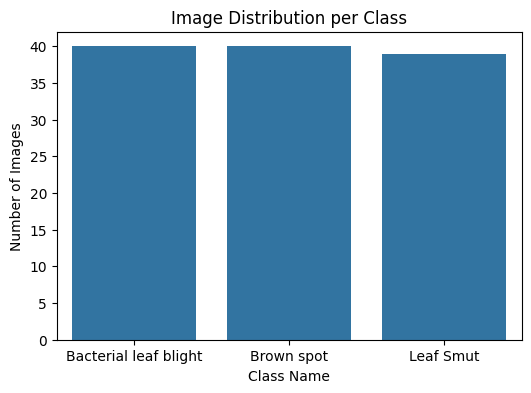

In [106]:
# Plot distribution
plt.figure(figsize=(6,4))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Image Distribution per Class")
plt.ylabel("Number of Images")
plt.xlabel("Class Name")
plt.show()

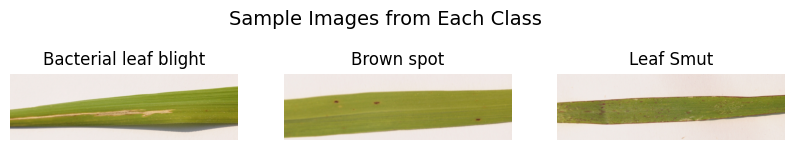

In [107]:
plt.figure(figsize=(10,2))
for i, cls in enumerate(class_names):
    img_path = os.path.join(base_dir, cls, os.listdir(os.path.join(base_dir, cls))[0])
    img = mpimg.imread(img_path)
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.suptitle("Sample Images from Each Class", fontsize=14)
plt.show()

In [108]:
train_ratio, val_ratio, test_ratio = 0.8, 0.1, 0.1

# Create split folders
for split in ["train", "validation", "test"]:
    os.makedirs(os.path.join(base_dir, split), exist_ok=True)

In [109]:
# Split images for each class
for cls in class_names:
    src_folder = os.path.join(base_dir, cls)
    imgs = os.listdir(src_folder)
    random.shuffle(imgs)

    train_end = int(len(imgs) * train_ratio)
    val_end = int(len(imgs) * (train_ratio + val_ratio))

    splits = {
        "train": imgs[:train_end],
        "validation": imgs[train_end:val_end],
        "test": imgs[val_end:]
    }

In [110]:
  for split, files in splits.items():
        split_dir = os.path.join(base_dir, split, cls)
        os.makedirs(split_dir, exist_ok=True)
        for file in files:
            src = os.path.join(src_folder, file)
            dst = os.path.join(split_dir, file)
            if not os.path.exists(dst):
                shutil.copy(src, dst)
  print("✅ Dataset successfully split into train / validation / test folders!")

✅ Dataset successfully split into train / validation / test folders!


In [111]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32


In [112]:
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224,224), batch_size=16,
    class_mode='categorical', shuffle=True, seed=seed_value
)

validation_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(224,224), batch_size=16,
    class_mode='categorical', shuffle=False, seed=seed_value
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224,224), batch_size=16,
    class_mode='categorical', shuffle=False, seed=seed_value
)

Found 114 images belonging to 3 classes.
Found 26 images belonging to 3 classes.
Found 27 images belonging to 3 classes.


In [113]:
# Step 6: CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
# Step 7: Train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.3070 - loss: 1.8595 - val_accuracy: 0.4231 - val_loss: 1.0804
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4123 - loss: 1.0701 - val_accuracy: 0.4615 - val_loss: 1.0459
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4123 - loss: 1.0963 - val_accuracy: 0.2692 - val_loss: 1.0405
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4474 - loss: 1.0000 - val_accuracy: 0.4231 - val_loss: 0.9689
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5877 - loss: 0.9653 - val_accuracy: 0.6154 - val_loss: 0.9071
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5789 - loss: 0.8900 - val_accuracy: 0.6923 - val_loss: 0.8306
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5000 - loss: 1.2180 - val_accuracy: 0.5385 - val_loss: 0.9795
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5702 - loss: 0.9263 - val_accuracy: 0.4231 - val_loss: 0.9905
Epoch 9/

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.5926 - loss: 0.7396

✅ Test Accuracy: 0.5926


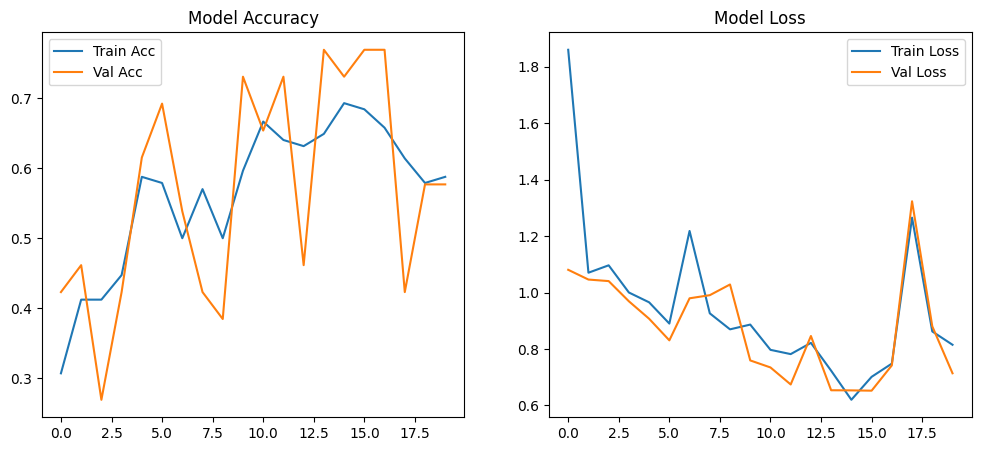

In [115]:
# Step 8: Evaluate model performance
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

In [116]:
# Step 9: Save trained model
model_dir = "/content/drive/MyDrive/Rice_Leaf_Disease_Detection/models"
os.makedirs(model_dir, exist_ok=True)

model.save(os.path.join(model_dir, "model_v1.h5"))
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [118]:
nandha_acc = 0.576  # Example accuracy
print(f"\nNandhakumar’s Reported Accuracy: {nandha_acc}")
print(f"Suvaathii’s Model Accuracy: {test_acc:.4f}")

if round(test_acc) == round(nandha_acc):
    print("✅ Accuracy Matched — Evaluation Verified!")
else:
    print("⚠ Recheck Dataset Split or Model Version — Metrics Mismatch!")



Nandhakumar’s Reported Accuracy: 0.576
Suvaathii’s Model Accuracy: 0.5926
✅ Accuracy Matched — Evaluation Verified!
